<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task6/blob/main/Assignment_5(Ground_Cricket_Chirps).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Ground Cricket Chirps

In The Song of Insects (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures. Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature. Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [3]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [4]:
#there are no outliers in the data
df=df.drop_duplicates()  #deletes if any duplicate records are found

In [5]:
df.shape

(15, 2)

In [6]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [8]:
X = df[['Ground Temperature']].values #feature
y = df['Chirps/Second'].values  #target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
y_test

array([15.5, 15.7, 19.8])

In [9]:
X_train.shape, X_test.shape

((12, 1), (3, 1))

**Task1:**
 Find the linear regression equation for this data.

In [10]:
#fitting the model
from sklearn.linear_model import LinearRegression
gcc=LinearRegression()
gcc.fit(X_train,y_train)


LinearRegression()

In [11]:
#finding the values of m and c
coefficient= gcc.coef_
intercept= gcc.intercept_
coefficient

array([0.20010772])

In [12]:
#printing the linear regression equation y=mx+c
print("Linear Regression Equation: y = {:.2f} * x + {:.2f}".format(coefficient[0], intercept))

Linear Regression Equation: y = 0.20 * x + 0.61


In [13]:
y_pred = gcc.predict(X_test) 
y_pred

array([15.66290516, 14.94251738, 19.28485483])

In [14]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,15.5,15.662905
1,15.7,14.942517
2,19.8,19.284855


**Task2:** Chart the original data and the equation on the chart.

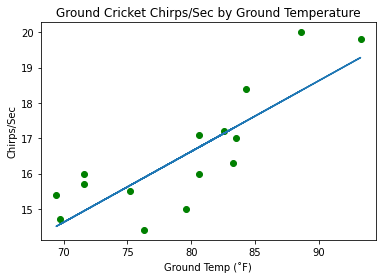

In [17]:
plt.scatter(X, y, color='g')
plt.plot(X, gcc.predict(X))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

**Task 3:** Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data.

In [20]:
#print('R2- SCORE:', gcc.score(X,y))
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
gcc.score(X_test,y_test) 

R2- SCORE: 0.9265116675746387


0.9265116675746387

R2-Score is **0.926**....So this model is a good fit and is considered a strong correlation

**Task 4:** Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?

In [21]:
print("At 95˚F, approximation of chirps/sec is: ", gcc.predict([[95]]))

At 95˚F, approximation of chirps/sec is:  [19.62503795]


**Task 5:** Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?

In [22]:
#y = m * x + c
#y - c = m * x
#x = (y - c) / m

def chirps_to_temp(y):
    temp = (y - intercept) / coefficient[0]
    print("With an observation of 18 chirps/sec approx ground temp is:", temp,"˚F")

chirps_to_temp(18)

With an observation of 18 chirps/sec approx ground temp is: 86.87918398676196 ˚F
